## Parcial 1

Por: Sandra Arce Mena & Angela María Cubillos Garay

Estrategia sugerida:

$k = 5 N/m $

$l = 3 m $

$m = 2 kg $

$g = 9.8 m/s^{2} $

$r_{0} = 15 m $

$\theta_{0} = \pi/8 $

$\dot r_{0} = 0 $

$\dot\theta_{0} = 0 $


In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

In [8]:
k = 5.

l = 3.

m = 2.

g = 9.8

r0 = 15.

theta0 = np.pi/8.

r_dot0 = 0.

theta_dot0 = 0.

In [9]:
def System(t,ri):
    
    r,theta = ri
    
    r_doubledot = (k/m)*(l-r)+g*np.cos(theta) + r*theta_dot**2       #ar
    theta_doubledot = -(g/r)*np.sin(theta)-(2/r)*r_dot0*theta_dot0   #at
    
    return np.array([r,theta,r_doubledot,theta_doubledot])

In [ ]:
N = 2001
t = np.linspace(0.,30.,N+1)

In [18]:
def r_2 (vn, rn, a, h=0.015):
    return vn+((1/12)*(5*a*rn)+(8*)-(a*rn)*h)

def First_equation(rn, vn, a, h=0.015):
    return vn+((1/2)*(3*a*(rn))-(a*rn)*h)

def Second_equation(rn, a, h=0.015):
    return rn+h*vn+((1/6)*(4*a*(rn))-(a*rn)*h**2)


In [ ]:
x = r*np.cos(theta-(np.pi/2))
y = r*np.sin(theta-(np.pi/2))

In [20]:
def Solution_Beeman(r0,theta0,t):   
    
    h =  (t[-1]-t[0])/(len(t)-1)

    aceleration_r= np.zeros(len(t)-1)
    aceleration_t = np.zeros(len(t)-1)
    positions_1 = np.zeros(len(t)-1)
    positions_2 = np.zeros(len(t)-1)
    velocities_1 = np.zeros(len(t)-1)
    velocities_2 = np.zeros(len(t)-1)
    
    aceleration_r[0]= System(r0,theta0)
    aceleration_t[0] = System(r0,theta0)
    positions_1[0] = r0
    positions_2[0] = theta0
    
    aceleration_r[1]= System(r0,theta0)
    aceleration_t[1]= System(r0[1],theta0)

    
    for i in range(1,N):
        
        positions_1[i+1]= positions_1[i] + h* velocities_1[i] + (1/6)*(4*aceleration_r[i]- aceleration_r[i-1])*h*2
        velocities_1[i+1]= velocities_1[i] + 1/2(3*aceleration_r[i]-aceleration_r(i-1))*h
        positions_2[i+1]= positions_2[i] + h* velocities_2[i] + 1/6(4*acele_t[i]- acele_t[i-1])*h*2
        velocities_2[i+1]= velocidades_2[i] + 1/2*(3*acele_t[i]-acele_t(i-1))*h
        aceleration_r[i+1]= System(positions_1[i+1], velocities_1[i+1])
        aceleration_t[i+1]= System(positions_2[i+1], velocities_2[i+1])
        
    return [positions_1, positions_2, aceleration_r, aceleration_t]
        

<IPython.core.display.Javascript object>


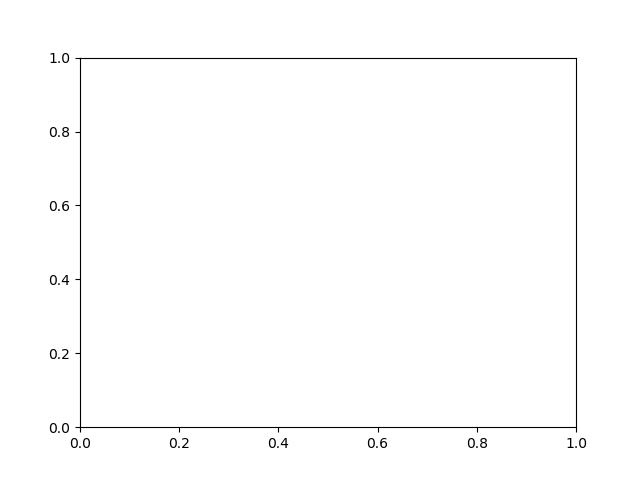

In [26]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1, projection='purple')
ax2 = fig.add_subplot(1,2,2,)
ax1.scatter(theta,r,marker='.',color='pink')


ax2.set_title('r = %.3f, angle = %.3f'%(r, theta*180/np.pi))

ax2.axis('equal')
circle = plt.Circle((0,0), 1, color='blue', fill = False)
ax2.add_patch(circle)


ax2.scatter(x,y,marker='.',color='r', label='Trajectory')
ax2.arrow( 0.,0., r0_[0], r0_[1], head_width=0.05, label=r'$\vec{r}$')
ax2.arrow( r0_[0], r0_[1], v10_[0], v10_[1], head_width=0.05 )
ax2.arrow( 0., 0., r*np.cos(maxtheta), maxr*np.sin(maxtheta), head_width=0.05 )

ax2.arrow( 0.,0., np.cos(3.07177), np.sin(3.07177), head_width=0.02  )

ax2.legend(loc=1)
ax2.set_xlabel(r'$x[Rt]$',fontsize=15)
ax2.set_ylabel(r'$y[Rt]$',fontsize=15)   

In [ ]:
Animation= anim.FuncAnimation(fig, Update, frames=len(t), init_func=init)

Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
Animation.save('LunarRocket.mp4', writer=writer_)